# Project: Mobile games AB testing Cookie Cats

Dataset: https://www.kaggle.com/code/ekrembayar/a-b-testing-step-by-step-hypothesis-testing/data

- Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three" style puzzle game where the player must connect tiles of the same color in order to clear the board and win the level. It also features singing cats. We're not kidding!

- As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention and game rounds.


## Goals:
- Get a grasp on the business problem we are trying to solve
- Determine if there is a difference between groups & make a inference based on the results

## Analysis Plan:
- Understand business problems and data
- Detect and resolve problems in data (missing values, outliers, unexpected values)
- EDA
- Hypothesis testing: Check normality and apply statistical test between groups
- Evaluate Results
- Make inferences

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cats = pd.read_csv('data/cookie_cats.csv')

In [3]:
cats.head(3)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False


## Description of data

- userid: unique number that identifies each player
- version - whether the player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).
- sum_gamerounds - the number of game rounds played by the player during the first week after installation
- retention_1 - did the player come back and play 1 day after installing?
- retention_7 - did the player come back and play 7 days after installing?

## Business problem:
- Want to know whether or not placing a gate on level 30 or level 40 increases player retention both 1 day after installing and 7 days after installing

## EDA

In [4]:
sns.set_style('darkgrid')
palette='Set2'

In [5]:
cats.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [6]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


Text(0.5, 1.0, 'Player retention 1 day after installation')

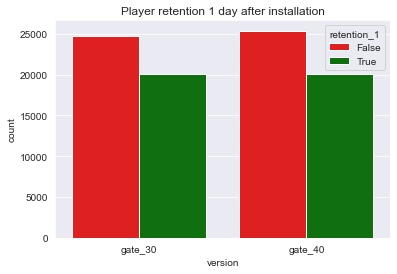

In [7]:
sns.countplot(data=cats, x='version', hue='retention_1', palette=['red','green'])
plt.title('Player retention 1 day after installation')

Text(0.5, 1.0, 'Player retention 7 day after installation')

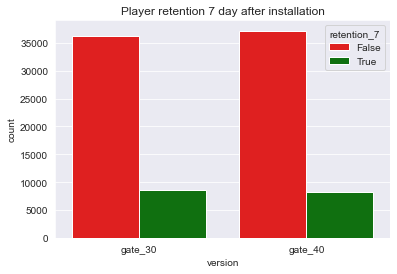

In [8]:
sns.countplot(data=cats, x='version', hue='retention_7', palette=['red','green'])
plt.title('Player retention 7 day after installation')

<AxesSubplot:xlabel='version', ylabel='sum_gamerounds'>

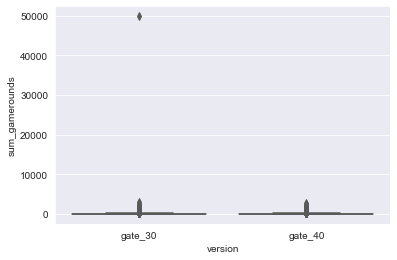

In [9]:
sns.boxplot(data=cats,x='version', y='sum_gamerounds', palette=palette)

## Clean data

In [10]:
cats.isna().sum()
# Looks like no null values

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [11]:
# handle outlier
cats[cats['sum_gamerounds'] > 40000]

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True


In [12]:
cats_no_outliers = cats[cats['sum_gamerounds']<=40000]

<AxesSubplot:xlabel='version', ylabel='sum_gamerounds'>

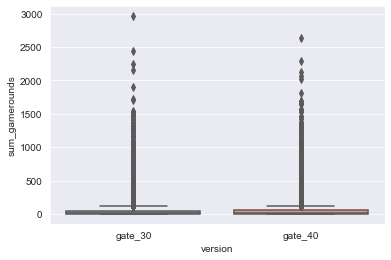

In [13]:
sns.boxplot(data=cats_no_outliers,x='version', y='sum_gamerounds', palette=palette)

## Check normality between the two groups

In [14]:
cats_no_outliers.groupby('version')['sum_gamerounds'].agg(['count', 'median', 'median', 'std', 'max'])

,count,median,median,std,max
version,,,,,
gate_30,44699,17,17,102.057598,2961
gate_40,45489,16,16,103.294416,2640


In [15]:
cats_no_outliers.reset_index(inplace=True)

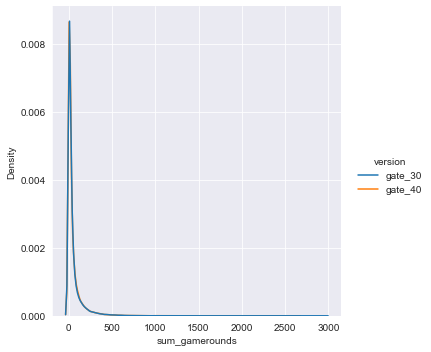

In [16]:
# What does the distribution of # of players look like per game round?
sns.displot(data=cats_no_outliers, x='sum_gamerounds', hue='version', kind='kde')

In [17]:
cats_no_outliers.groupby('sum_gamerounds')['userid'].count().reset_index().head(20)

,sum_gamerounds,userid
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629
5,5,2992
6,6,2861
7,7,2379
8,8,2267
9,9,2013


In [22]:
print(F"Retention 1 day after: {cats_no_outliers['retention_1'].value_counts()[1]/len(cats_no_outliers)}")
print(F"Retention 7 days after: {cats_no_outliers['retention_7'].value_counts()[1]/len(cats_no_outliers)}")
print(F"Retention change: {(cats_no_outliers['retention_7'].value_counts()[1]/len(cats_no_outliers) - cats_no_outliers['retention_1'].value_counts()[1]/len(cats_no_outliers)) / (cats_no_outliers['retention_1'].value_counts()[1]/len(cats_no_outliers)) * (100)}")



Retention 1 day after: 0.4452144409455803
Retention 7 days after: 0.1860557945624695
Retention change: -58.20984733394765


## Observations from EDA

- 3994 players installed the game but never actually played a single round
- Retention between 1 day and 7 days sees a 58% decrease in players that come back after day 7 compared to day 1
- The amount of users that play the game are highly skewed towards the early levels


## Compare

1. How is retention between the two groups?

In [24]:
cats_no_outliers.head(2)

,index,userid,version,sum_gamerounds,retention_1,retention_7
0,0,116,gate_30,3,False,False
1,1,337,gate_30,38,True,False


In [41]:
cats_no_outliers['retention'] = cats_no_outliers['retention_1'].astype(str) + cats_no_outliers['retention_7'].astype(str)
cats_no_outliers.head()

/var/folders/lm/qyhkwyxn1jx1gmv7y89fl4qmfkzt2b/T/ipykernel_2304/2134455403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cats_no_outliers['retention'] = cats_no_outliers['retention_1'].astype(str) + cats_no_outliers['retention_7'].astype(str)


,index,userid,version,sum_gamerounds,retention_1,retention_7,retention
0,0,116,gate_30,3,False,False,FalseFalse
1,1,337,gate_30,38,True,False,TrueFalse
2,2,377,gate_40,165,True,False,TrueFalse
3,3,483,gate_40,1,False,False,FalseFalse
4,4,488,gate_40,179,True,True,TrueTrue


In [44]:
cats_no_outliers.groupby(['version', 'retention']).count()

index  userid  sum_gamerounds  retention_1  retention_7
version retention                                                          
gate_30 FalseFalse  22840   22840           22840        22840        22840
        FalseTrue    1825    1825            1825         1825         1825
        TrueFalse   13358   13358           13358        13358        13358
        TrueTrue     6676    6676            6676         6676         6676
gate_40 FalseFalse  23597   23597           23597        23597        23597
        FalseTrue    1773    1773            1773         1773         1773
        TrueFalse   13613   13613           13613        13613        13613
        TrueTrue     6506    6506            6506         6506         6506

<AxesSubplot:xlabel='retention', ylabel='count'>

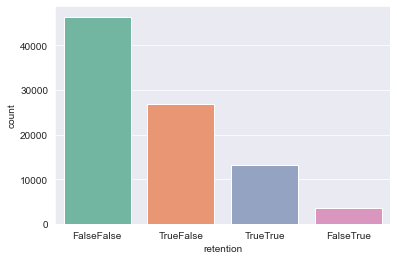

In [45]:
sns.countplot(data=cats_no_outliers, x='retention', palette='Set2')

- Most players dont come back after day 1
- Second most amount of players come back after day 1, but not day 7
- Some players dont come back after day 1, but come back again after day 7

## AB Testing

- Split control and test group (group 30 vs group 40)
- Shapiro test for normality
- Levene test for homogeneity
- Parametric + homogenous = T-test
- Parametric ! homogenous = WElch Test
- Non-parametric = Mann Whitney U test
